# CA05-A - Logistic Regression
### Vania Revelina

## Dataset

In [21]:
# import pandas package
import pandas as pd

# read data into a pandas dataframe called cvd
cvd = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')

In [22]:
# look at the first 5 rows to see a glimpse of the data structure
cvd.head(10)

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.00,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.00,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.50,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.00,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.00,0,0,0,2,1,1,2
5,0,67,1,3,3,140.0,35.5,101.0,87.2,0.00,0,1,0,1,1,4,4
6,0,68,1,2,1,101.0,39.0,93.0,80.5,9.20,0,0,0,2,3,4,4
7,0,67,1,2,1,107.0,32.0,80.0,73.2,0.00,0,1,0,2,2,4,4
8,0,44,1,2,1,100.0,36.5,89.0,79.1,6.75,0,0,0,3,3,4,4
9,0,42,1,2,1,105.0,35.5,90.0,78.1,21.00,0,0,0,3,2,3,3


In [23]:
# call the info() method to see the column details and data types
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


In [24]:
# see the description of all variables
cvd.describe()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


## Part 1: Logistic Regression
Build a binary classifier model to predict the CVD Risk (Yes/No, or 1/0) using a Logistic Regression Model with the best performance possible.

In [25]:
# get dummy variables for all the categoricals ('race','educat','mstat','srhype','parrptdiab','bend25','happy25','tired25','hlthlm25')
cvd = pd.get_dummies(data=cvd, columns=['race','educat','mstat','srhype','parrptdiab','bend25','happy25','tired25','hlthlm25'],drop_first=True)

In [26]:
# import necessary packages
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# split dataset into train set: independent (X_train) and dependent (y_train)
# and test set: independent (X_test) and dependent (y_test)
X_train, X_test, y_train, y_test = train_test_split(cvd.drop('cvd_4types',axis=1),cvd['cvd_4types'], test_size=0.3, random_state=23)

# instantiate logistic regression model
logreg = LogisticRegression(solver='liblinear', random_state=23)

# specify hyperparameter values to try to put into the logistic regression model
grid_values = {'penalty': ['l1','l2'], 'C': np.logspace(-4, 4, 20)}

# use GridSearchCV to try out each of the grid values as hyperparameters for the logistic regression model
clf = GridSearchCV(logreg, param_grid = grid_values, cv = 5)

# fit to get best model
best_model = clf.fit(X_train, y_train)

# print the best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])


Best Penalty: l2
Best C: 10000.0


In [27]:
# predict on test set
y_pred = best_model.predict(X_test)

# print classification report for future comparison
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.51      0.61       404
           1       0.72      0.88      0.79       569

    accuracy                           0.73       973
   macro avg       0.73      0.69      0.70       973
weighted avg       0.73      0.73      0.71       973



In [28]:
# instantiate a second logistic regression with a different solver: newton-cg
# newton-cg solver only works for 'l2' penalty, this is why we cannot put this solver together
# with liblinear when trying out hyperparameters for GridSearchCV
logreg2 = LogisticRegression(solver='newton-cg',penalty='l2', random_state=23)

# specify hyperparameter values to try
grid_values2 = {'C': np.logspace(-4, 4, 20)}

# use GridSearchCV to try out the values
clf2 = GridSearchCV(logreg2, param_grid = grid_values2, cv = 5)

# fit to get the best model
best_model2 = clf2.fit(X_train, y_train)

# print the best hyperparameter
print('Best C:', best_model2.best_estimator_.get_params()['C'])

Best C: 0.615848211066026


In [29]:
# predict on test set
y_pred2 = best_model2.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.76      0.51      0.61       404
           1       0.72      0.88      0.79       569

    accuracy                           0.73       973
   macro avg       0.74      0.70      0.70       973
weighted avg       0.73      0.73      0.72       973



#### Part 1 Conclusion
Seems that the F1-score for class 1 is the same for either hyperparameters. For simplicity, we will be using the following hyperparameters going forward:
* solver = 'newton-cg'
* penalty = 'l2'
* C = 0.616

## Part 2: Feature Importance
Display the Feature Importance of all the features sorted in the order of decreasing influence on the CVD Risk.

In [35]:
# instantiate best logistic regression model
best_model = LogisticRegression(solver='newton-cg', penalty='l2', C=0.616, random_state=23)
# fit training set
best_model.fit(X_train, y_train)

# get coefficients and assign it into a pandas series
coefs = pd.Series(best_model.coef_[0], index = X_train.columns, name='coefficients')
# the sign of each coefficient is only an indication of positive or negative correlation,
# the higher the absolute values of the correlation coefficient, the higher the influence
# of the feature to the dependent variable.
# Because of this, we apply a lambda function to the series to only get the absolute values for each coefficient.
coefs = coefs.apply(lambda x: abs(x))
# display the series in a descending order of influence
coefs.sort_values(ascending=False)

race_3          2.165701
mstat_4         1.611206
hlthlm25_5      1.456916
educat_4        1.220265
mstat_8         0.957383
parrptdiab_1    0.824542
hlthlm25_4      0.659768
hlthlm25_2      0.623591
mstat_2         0.534007
hlthlm25_3      0.443619
happy25_6       0.439732
race_2          0.416702
mstat_3         0.325098
educat_2        0.296953
tired25_3       0.276107
tired25_6       0.266860
tired25_5       0.242009
bend25_3        0.186483
happy25_3       0.167413
happy25_5       0.167281
tired25_2       0.158044
tired25_4       0.150045
happy25_2       0.086249
waist           0.078291
hip             0.058179
tea15           0.052847
happy25_4       0.047819
neck20          0.035015
av_weight_kg    0.021405
educat_3        0.009379
age_s1          0.005803
bend25_2        0.004503
cgpkyr          0.001332
srhype_1        0.000142
Name: coefficients, dtype: float64

## Part 3: Evaluate Performance
Evaluate the performance of your model (including ROC Curve), explain the performance and draw a meaningful conclusion.

true negatives: 205
false positives: 199
false negatives: 66
true positives: 503
precision: 0.72
recall: 0.88
f1-score: 0.79
AUC (Area Under Curve): 0.7543980232821172


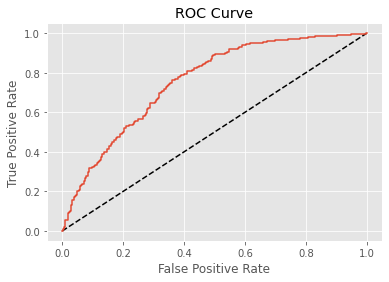

In [44]:
# import necessary packages
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")

y_pred = best_model.predict(X_test)

# create a confusion matrix based on our actual y labels and predicted y labels
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
confmatstr = ["true negatives", "false positives", "false negatives", "true positives"]
confmat = [tn, fp, fn, tp]
# print the counts
for i in range(len(confmat)):
    print("{}: {}".format(confmatstr[i],confmat[i]))

print("===================================")

# create an array of measure values
measures = precision_recall_fscore_support(y_test,y_pred)
measure_names = ["precision:","recall:","f1-score:"]
# print the measure values
for i in range(len(measures)-1):
    print(measure_names[i],np.round(measures[i][1],2))

print("===================================")

y_pred_prob = best_model.predict_proba(X_test)[:,1]

# define false positive rate, true positive rate and thresholds
fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)

# print the area under the (ROC) curve
print("AUC (Area Under Curve):",auc(fpr, tpr))

# plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()